In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [0]:
def generate_tensors(path):
    X=[]
    for image in os.listdir(path):
      image_path=os.path.join(path,image)
      image_object=Image.open(image_path)
      image_object=image_object.resize((90,90))
      image_array=np.asarray(image_object)
      X.append(image_array[1:,1:])
      
    stacked=np.vstack(X)
    stacked=stacked.reshape(len(X),89,89,3)
    return stacked
      

In [0]:
normal_images=generate_tensors('./Normal')
defected1_images=generate_tensors('./Defected1')
defected2_images=generate_tensors('./Defected2')

In [84]:
normal_images.shape

(99, 89, 89, 3)

In [85]:
defected1_images.shape

(88, 89, 89, 3)

In [86]:
defected2_images.shape

(98, 89, 89, 3)

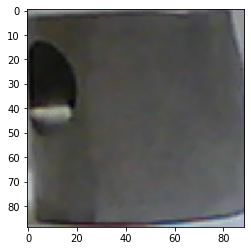

In [92]:
import random
plt.imshow(defected1_images[random.randint(0,88)])

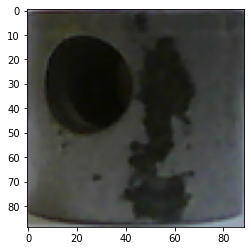

In [91]:
plt.imshow(defected2_images[random.randint(0,98)])

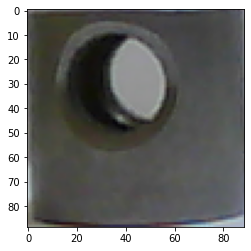

In [93]:
plt.imshow(normal_images[random.randint(0,88)])

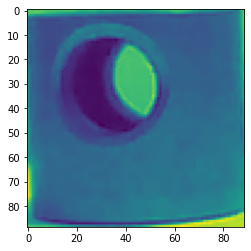

In [94]:
plt.imshow(normal_images[random.randint(0,88)].mean(axis=2))

In [0]:
def generate__grayscale_tensors(path):
    X=[]
    for image in os.listdir(path):
      image_path=os.path.join(path,image)
      image_object=Image.open(image_path)
      image_object=image_object.resize((90,90))
      image_array=np.asarray(image_object)
      X.append(image_array[1:,1:].mean(axis=2))
      
    stacked=np.vstack(X)
    stacked=stacked.reshape(len(X),89,89)
    return stacked
      

In [0]:
grayscale_defected_1=generate__grayscale_tensors('./Defected1')

In [99]:
grayscale_defected_1.shape

(88, 89, 89)

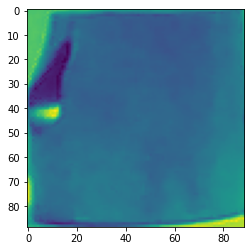

In [110]:
plt.imshow(grayscale_defected_1[random.randint(0,88)])

In [0]:
grayscale_defected_2=generate__grayscale_tensors('./Defected2')

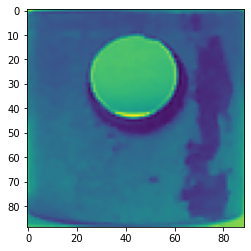

In [112]:
plt.imshow(grayscale_defected_2[random.randint(0,98)])

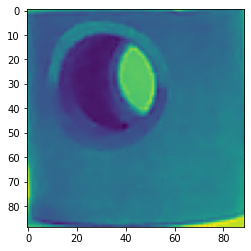

In [106]:
grayscale_normal=generate__grayscale_tensors('./Normal')
plt.imshow(grayscale_normal[random.randint(0,99)])

(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)
(89, 89)


In [113]:
grayscale_normal.shape

(99, 89, 89)

In [0]:
#generating normal-normal and normal-d2 pairs  d1 grayscale will be used for validation
x1=[]
x2=[]
y=[]
for img in grayscale_normal:
  x1.append(img)
  x2.append(grayscale_normal[random.randint(0,98)])
  y.append(1)

  x1.append(img)
  x2.append(grayscale_defected_2[random.randint(0,97)])
  y.append(0)

#generating defective-defective pairs
for img in grayscale_defected_2:
  x1.append(img)
  x2.append(grayscale_defected_2[random.randint(0,97)])
  y.append(1)

  x1.append(img)
  x2.append(grayscale_normal[random.randint(0,98)])
  y.append(0)

In [0]:
y=np.array(y)

In [139]:
y.shape

(394,)

In [140]:
len(x1)

394

In [141]:
len(x2)

394

In [0]:
x1=np.vstack(x1).reshape(394,89,89)
x2=np.vstack(x2).reshape(394,89,89)

In [143]:
print('Input 1 shape: ',x1.shape)
print('Input 2 shape: ',x2.shape)
print('Output shape: ',y.shape)

Input 1 shape:  (394, 89, 89)
Input 2 shape:  (394, 89, 89)
Output shape:  (394,)


In [0]:
x1_extended=x1.reshape(394,89,89,1)
x2_extended=x2.reshape(394,89,89,1)

In [195]:
print('Input 1 shape: ',x1_extended.shape)
print('Input 2 shape: ',x2_extended.shape)
print('Output shape: ',y.shape)

Input 1 shape:  (394, 89, 89, 1)
Input 2 shape:  (394, 89, 89, 1)
Output shape:  (394,)


In [186]:
x1.shape

(394, 89, 89)

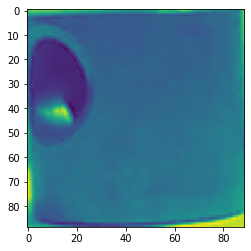

In [150]:
plt.imshow(x1[1])

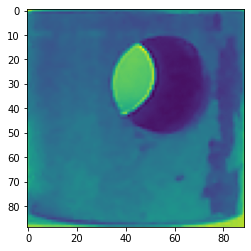

In [151]:
plt.imshow(x2[1])

In [152]:
y[1]

0

##Siamese Model Build

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, Input, MaxPooling2D,Lambda,Flatten

In [0]:
from tensorflow.keras.models import Sequential

In [0]:
input_shape=x2.shape[1:]

In [169]:
input_shape

(89, 89)

In [0]:
shared_model=Sequential()

In [0]:
shared_model.add(Conv2D(64,(10,10),activation='relu',input_shape=(89,89,1)))
shared_model.add(MaxPooling2D())
shared_model.add(Conv2D(128,(7,7),activation='relu'))
shared_model.add(MaxPooling2D())
shared_model.add(Conv2D(128,(4,4),activation='relu'))
shared_model.add(MaxPooling2D())
shared_model.add(Conv2D(256,(4,4),activation='relu'))
shared_model.add(Flatten())
shared_model.add(Dense(256*4*4,activation='sigmoid'))

In [0]:
input_1=Input((89,89,1))
input_2=Input((89,89,1))

In [0]:
encoded_output_1=shared_model(input_1)

In [0]:
encoded_output2=shared_model(input_2)

In [0]:
import tensorflow.keras.backend as K

In [0]:
L1_layer=Lambda(lambda tensors:K.abs(tensors[0]-tensors[1]))
L1_distance=L1_layer([encoded_output_1,encoded_output2])

In [0]:
prediction=Dense(1,activation='sigmoid')(L1_distance)

In [0]:
siamese_network=Model(inputs=[input_1,input_2],outputs=prediction)

In [201]:
siamese_network.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 89, 89, 1)]  0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 89, 89, 1)]  0                                            
__________________________________________________________________________________________________
sequential_12 (Sequential)      (None, 4096)         17976128    input_4[0][0]                    
                                                                 input_5[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 4096)         0           sequential_12[1][0]          

In [0]:
from tensorflow.keras.optimizers import Adam
optimizer=Adam(lr=0.00006)
siamese_network.compile(loss='binary_crossentropy',optimizer=optimizer)

In [202]:
y.shape

(394,)

In [203]:
y_extended=y.reshape(394,1)
y_extended.shape

(394, 1)

In [204]:
x1_extended.shape

(394, 89, 89, 1)

In [205]:
x2_extended.shape

(394, 89, 89, 1)

In [219]:
import pandas as pd
history=siamese_network.fit([x1_extended,x2_extended],y_extended,epochs=5,validation_split=0.2)

Epoch 1/5
10/10 [==============================] - 47s 5s/step - loss: 0.1598 - val_loss: 0.1553
Epoch 2/5
10/10 [==============================] - 47s 5s/step - loss: 0.0964 - val_loss: 0.0959
Epoch 3/5
10/10 [==============================] - 47s 5s/step - loss: 0.0602 - val_loss: 0.0508
Epoch 4/5
10/10 [==============================] - 47s 5s/step - loss: 0.0461 - val_loss: 0.0457
Epoch 5/5
10/10 [==============================] - 47s 5s/step - loss: 0.0370 - val_loss: 0.0387


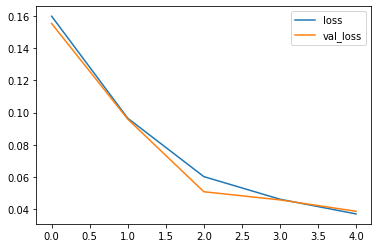

In [220]:
pd.DataFrame(history.history).plot(kind='line')

In [221]:
history

In [223]:
x1_extended[0].shape

(89, 89, 1)

In [0]:
prediction=siamese_network.predict([x1_extended[:1],x2_extended[:1]])

In [231]:
prediction[0,0]*100

0.99978524

In [230]:
x1_extended[:1].shape

(1, 89, 89, 1)

In [233]:
grayscale_defected_2[0].shape

(89, 89)

# Checking similarity between two normal images

In [0]:
normal_1=grayscale_normal[0]
normal_2=grayscale_normal[1]

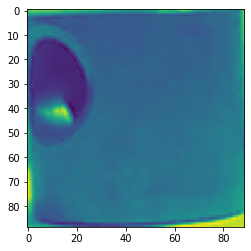

In [235]:
plt.imshow(normal_1)

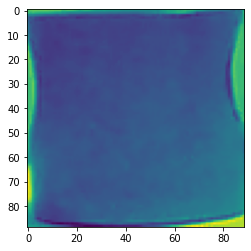

In [236]:
plt.imshow(normal_2)

In [0]:
def generate_prediction(img1,img2):
  rescaled1=img1.reshape(1,89,89,1)
  rescaled2=img2.reshape(1,89,89,1)
  prediction=siamese_network.predict([rescaled1,rescaled2])
  print(prediction[0,0],'% similar')

In [241]:
generate_prediction(normal_1,normal_2)

0.9961588 % similar


In [0]:
random_index=random.randint(0,87)

# Comparing a normal and defective piston's image

In [0]:
normal_piston=grayscale_normal[random.randint(0,87)]
defective_piston=grayscale_defected_2[random.randint(0,87)]

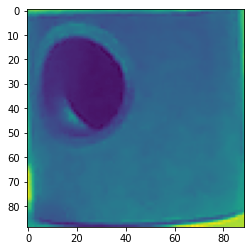

In [249]:
plt.imshow(normal_piston )

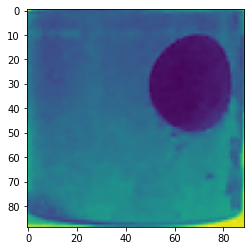

In [250]:
plt.imshow(defective_piston)

In [252]:
generate_prediction(normal_piston,defective_piston) #the defect was noticed

0.0019050799 % similar


In [0]:
bent_piston=grayscale_defected_1[random.randint(0,87)]
bent_piston2=grayscale_defected_1[random.randint(0,87)]

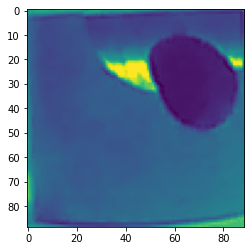

In [259]:
plt.imshow(bent_piston)

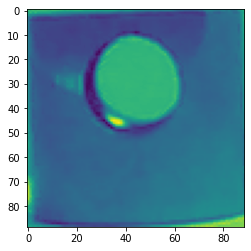

In [260]:
plt.imshow(bent_piston2)

In [261]:
#Our goal is to determine if this piston is
# defective even though our model has never seen this type of defect before.
# we will compare similarity scores with a normal and another defective piston of the same
# type that the model has not seen before.
# this is to see how well the model has learnt the ability to determine similarity between
# two pistons

#Lets assume we already know that bent_piston2 is defective to we compare it 
# with the current piston.


generate_prediction(bent_piston,bent_piston2)

0.9995171 % similar


In [0]:
#As we can see, even though the model had never encountered neither the two images
# nor the type of the defect shown the model can be used to tell similarity between
# two pistons.